## Task 2 Python

Write a function to calculate how many days will the daily orders take to be packed.

e.g. of orders expected on 2022-01-10 (38k), 92% will be packed on the same day, and
8% on the second day.
Requisites:
● % of how many orders will take 1 day, 2 days and so on. See example above
● Take the current backlog into account. If there are 100k units waiting to be
packed, packing days will increase for all upcoming

In [1]:
#Import necessery libraies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Open packaging capacity prediction file

link = (r"C:\Users\Piotr\Documents\PVH\Orders_packaging_capacity.csv")
df = pd.read_csv(link, header=0, sep = ";", parse_dates=['order_date'])

# Check null values in data frame
total_nulls = df.isnull().sum()
print(f'The total null values:\n{total_nulls}')

df.head()
df.dtypes


The total null values:
order_date            0
warehouse_capacity    0
order_forecast        0
dtype: int64


order_date            datetime64[ns]
warehouse_capacity             int64
order_forecast                 int64
dtype: object

In [2]:
# Show the first few rows
df.head(3)
df.dtypes

order_date            datetime64[ns]
warehouse_capacity             int64
order_forecast                 int64
dtype: object

In [3]:
# Add Initial backorders to dasta frame
df.loc[df.index[0], 'initial_BO'] = 10000
df['initial_BO']= df['initial_BO'].fillna(0)
df.head(3)

,order_date,warehouse_capacity,order_forecast,initial_BO
0,2022-01-10,35000,38000,10000.0
1,2022-02-10,35000,38000,0.0
2,2022-03-10,35000,38000,0.0


In [4]:
# Insert new columns that will calculate daily percentage missing capacity
df['procentage_daily_missing_capacity'] = 1 - (df.warehouse_capacity / df.order_forecast)

#Insert new column that calculate percentage order pack next day
df['procentage_order_pack_next_day'] = ((df.order_forecast + df.initial_BO - df.warehouse_capacity)/ (df.order_forecast)*100)
df['procentage_order_pack_next_day'] = df['procentage_order_pack_next_day'].cumsum().round()

Insert new column that calculate percentage order pack with not delay
df['percentage_order_pack_no_delay'] = 100 - df.procentage_order_pack_next_day.round()

print(df.head(10))

SyntaxError: invalid syntax (Temp/ipykernel_4888/2496244982.py, line 8)

In [5]:
# Adding daily static BO quantity and inintial BO quantity
df['daily_BO'] = df.order_forecast - df.warehouse_capacity
df['initial_and_daily_BO'] = df.initial_BO + df.daily_BO.cumsum()

# Calculate cummulative values for warehouse and orders
df['orders_cummulative'] = df.initial_BO + df.order_forecast.cumsum()
df['wh_cummulative_capacity'] = df.warehouse_capacity.cumsum()

In [6]:
print(df.head(10))

  order_date  warehouse_capacity  order_forecast  initial_BO  daily_BO  \
0 2022-01-10               35000           38000     10000.0      3000   
1 2022-02-10               35000           38000         0.0      3000   
2 2022-03-10               35000           38000         0.0      3000   
3 2022-04-10               35000           38000         0.0      3000   
4 2022-05-10               35000           38000         0.0      3000   
5 2022-06-10               35000           38000         0.0      3000   
6 2022-07-10               35000           38000         0.0      3000   
7 2022-08-10               35000           38000         0.0      3000   
8 2022-09-10               35000           38000         0.0      3000   
9 2022-10-10               35000           38000         0.0      3000   

   initial_and_daily_BO  orders_cummulative  wh_cummulative_capacity  
0               13000.0             48000.0                    35000  
1                6000.0             76000.0

<AxesSubplot:>

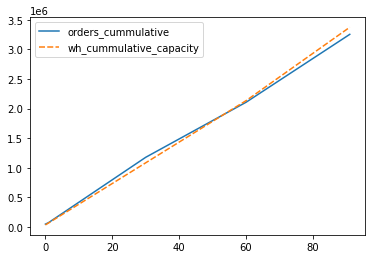

In [7]:
# Plot cummulative orders vs warehouse capacity

df1= df[['order_date', 'orders_cummulative', 'wh_cummulative_capacity']]
sns.lineplot(data=df1)
